In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#the dataset aims to predict a certain flower given some input values. It is a multi-class classification problem.
irisDataset = pd.read_csv('/content/drive/MyDrive/MachineLearning/datasets/IRIS.csv')
irisDataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#normalization
X_data = irisDataset.iloc[:,:-1]
y_data = irisDataset.loc[:,'species'].values
X_data=(X_data-X_data.min())/(X_data.max()-X_data.min())
X_data.insert(X_data.shape[1],'species',y_data)
X_data.head()
#for sklearn model used at the end
X1_data = X_data

**One-hot encoding**

In [5]:
#One-Hot encoding the categorical parameters using get_dummies()
X_data = pd.get_dummies(X_data, columns = ['species'])
X_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,0.222222,0.625000,0.067797,0.041667,1,0,0
1,0.166667,0.416667,0.067797,0.041667,1,0,0
2,0.111111,0.500000,0.050847,0.041667,1,0,0
3,0.083333,0.458333,0.084746,0.041667,1,0,0
4,0.194444,0.666667,0.067797,0.041667,1,0,0


#Softmax Regression#

In [6]:
X_data = X_data.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data[:,:-3],X_data[:,4:X_data.shape[1]], test_size=0.2, shuffle=True)
print('N.samples in training set: ', len(X_train))
print('N.samples in test set: ', len(X_test))

N.samples in training set:  120
N.samples in test set:  30


In [8]:
def multi_regs(weights,bias,x_i):
  logR_out = bias + np.dot(x_i,weights)
  return logR_out

def softmax(logR_out):
  exp = np.exp(logR_out - np.max(logR_out))
  for i in range(len(logR_out)):
        exp[i] /= np.sum(exp[i])
  
  return exp

def cross_entropy_loss(y_pred,y_true):
  loss= - np.sum(y_true*np.log(y_pred))
  c_e_l = loss/float(y_pred.shape[0])
  return c_e_l


def GD(X,y,lr,n_epochs):
  n_samples, n_inputs = X.shape
  n_classes = y.shape[1]

  accs_scores = []
  losses = []

  weights = np.zeros((n_inputs, n_classes))
  bias = np.zeros(n_classes)

  for epoch in range(n_epochs):
    sum_loss = 0
    tot_correct = 0
    logR_out = multi_regs(weights,bias,X)
    y_pred = softmax(logR_out)
    #paramters updating
    error = y - y_pred
    weights = weights + lr*np.dot(X.T,error)
    bias = bias + lr*np.sum(error)
    
    #training accuracy computation 
    max_index_pred = np.argmax(y_pred,axis=1)
    max_index_true = np.argmax(y,axis=1)
    tot_correct = np.sum(max_index_pred == max_index_true)
    
    #loss computation
    loss = cross_entropy_loss(y_pred,y)
    epoch_acc = tot_correct/len(y)
    accs_scores.append(epoch_acc)
    losses.append(loss)
    #to print metrics at every epoch
    #print(f'Epoch {epoch+1}, loss: {loss}, accuracy: {epoch_acc}')
  return weights,bias,accs_scores,losses

lr = 0.03
n_epochs = 1000
# use classic GD gradient descent where all the dataset is considered. 
weights,bias,accs_scores,losses = GD(X_train,y_train,lr,n_epochs)

**Plot Training loss and accuracy**

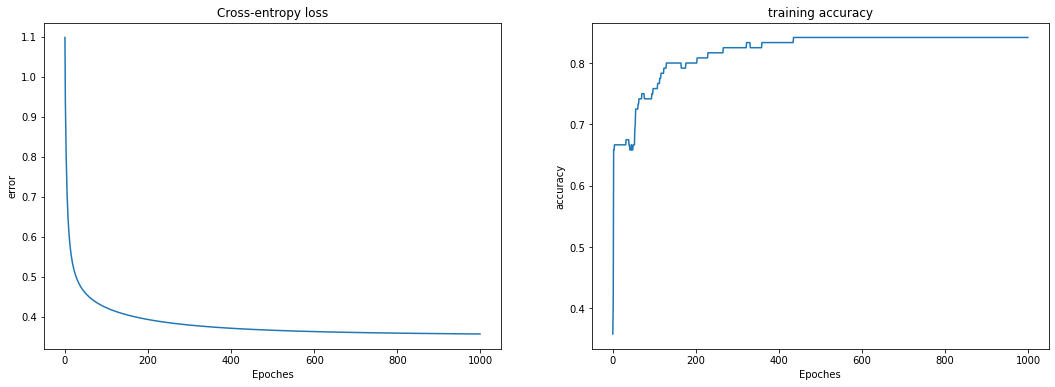

In [9]:
n_epoches = [x for x in range(0,n_epochs)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
ax1.plot(n_epoches,losses)
ax1.set_xlabel('Epoches')
ax1.set_ylabel('error')
ax1.set_title('Cross-entropy loss')

ax2.plot(n_epoches,accs_scores)
ax2.set_xlabel('Epoches')
ax2.set_ylabel('accuracy')
ax2.set_title('training accuracy')
plt.show()

**Test Phase**

In [10]:
def predictions(weights,bias,x_i,):
  multi_out = bias+np.dot(x_i,weights)
  preds = softmax(multi_out)
  max = np.argmax(preds,axis=1)
  return max

In [11]:
test_correct = 0
max_idx = predictions(weights,bias,X_test)
max_true = np.argmax(y_test,axis=1)
correct_test = np.sum(max_idx == max_true)
print('Model accuracy: ', correct_test /float(len(y_test)))

Model accuracy:  0.8333333333333334


*comparison with the SKlearn Model*

In [5]:
X1_data = X1_data.values

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_data[:,:-1],X1_data[:,4:X_data.shape[1]], test_size=0.2, shuffle=True)
print('N.samples in training set: ', len(X1_train))
print('N.samples in test set: ', len(X1_test))

N.samples in training set:  120
N.samples in test set:  30


In [8]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
y_tr = y1_train.ravel()
LR.fit(X1_train, y_tr)
y_t = y1_test.ravel()
score = LR.score(X1_test, y_t)
print('Sklearn Model accuracy: ', score)

Sklearn Model accuracy:  0.9
